In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import library_data_science as lds

# Random walk

**Random walk** is an example of a simple stochastic process demonstrating the power of randomness. In science, we often encounter this concept, for instance, in the movement of particles, which, despite certain mathematical models, contains an element of randomness. Another example is the stock market, where, despite well-developed operational schemes, it surprises us daily with its unpredictability.

The simplest random walk model assumes moving from a starting point with a specified number of steps in one of four directions: left, right, up, or down.

In [2]:
def distance(X1: tuple, X2: tuple) -> float:
    """Calculates the distance between points X1 and X2 on euclidean space.
    
       Sizes of X1 and X2 should be equal."""
    
    if not (len(X1) == len(X2)):
        print('Invalid input!')
        return -1
    else:
        counter = 0
        for i in range(len(X1)):
            counter = counter + ((X1[i] - X2[i]) ** 2)
        return counter ** 0.5


def random_walk(start: tuple[float, float], weights: dict, steps = 100000, display = False) -> tuple[float, float]:
    """Function simulates the random walk algorithm.

       Dictionary of weights should contain number of steps in every side {left, right, up, down}.
        
       It is highly recomended to use this function in another function to clearly defined purpose.
       
       If the input data will be wrong, function returns -1."""

    if 'left' not in weights or 'right' not in weights or 'up' not in weights or 'down' not in weights:
        print('Invalid input!')
        return -1
    else:
        # Storage of points
        X = []
        Y = []

        # Actual position
        x = start[0]
        y = start[1]

        # Walk
        for attempt in range(steps):
            horizontal_vertical = random.choice(['left', 'right', 'up', 'down'])
            
            match horizontal_vertical:
                case 'left':
                    x = x - weights['left']
                case 'right':
                    x = x + weights['right']
                case 'up':
                    y = y + weights['up']
                case 'down':
                    y = y - weights['down']

            X.append(x)
            Y.append(y)
        
        # Diagram using matplotlib
        if display:
            plt.plot(X, Y, zorder=1)
            plt.scatter(start[0], start[1], color='orange', label='start', linewidths=5, zorder=2)
            plt.scatter(x, y, color='red', label='end', linewidths=5, zorder=2)
            plt.legend()
            plt.show()
        
        # Return the actual position
        return (x, y)

Personally, I find random walk plots very satisfying, as they often resemble the shapes of islands.

In [3]:
start_point = (15, 48)

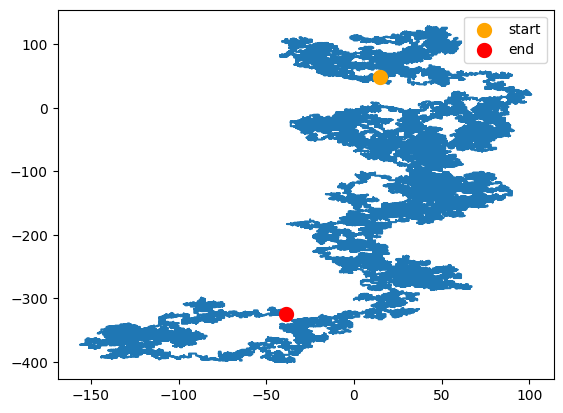

Distance between point (15, 48) to the walker: 375.8989


In [4]:
result = random_walk(
    start = start_point,
    weights = {
        'left': 1,
        'right': 1,
        'up': 1,
        'down': 1
    },
    display = True
)

print(f'Distance between point {start_point} to the walker:', np.round(distance(start_point, result), 4))

### Biased random walk

A commonly considered variation of random walk is the biased random walk, where the probabilities of choosing a direction are not equal. \
For example, $\mathcal{P}(left) = 0.25, \mathcal{P}(right) = 0.25, \mathcal{P}(up) = 0.3, \mathcal{P}(down) = 0.2$.

For the purpose of the experiment, I created two functions: one where the probabilities of choosing a direction are identical, and another where 'north' is preferred.

In [5]:
def drunkard_s_walk(start: tuple[float, float], steps = 100000, display = False):
    return random_walk(
        start = start,
        weights = {
            'left': 1,
            'right': 1,
            'up': 1,
            'down': 1
        },
        steps = steps,
        display = display
    )


def masochist_s_walk(start: tuple[float, float], steps = 100000, display = False):
    return random_walk(
        start = start,
        weights = {
            'left': 1,
            'right': 1,
            'up': 1.1,
            'down': 1
        },
        steps = steps,
        display = display
    )

In [6]:
start_point = (0, 0)

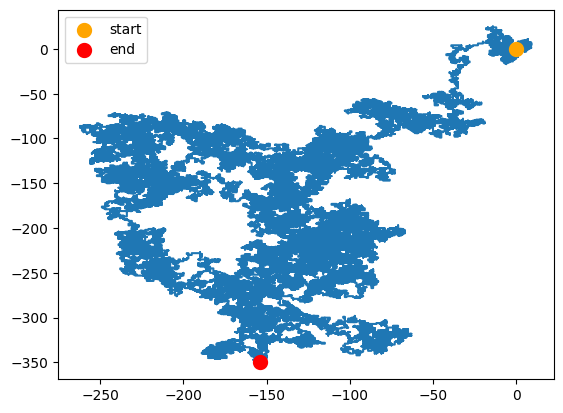

Distance between point (0, 0) to the walker: 382.382


In [7]:
result = drunkard_s_walk(start_point, display = True)

print(f'Distance between point {start_point} to the walker:', np.round(distance(start_point, result), 4))

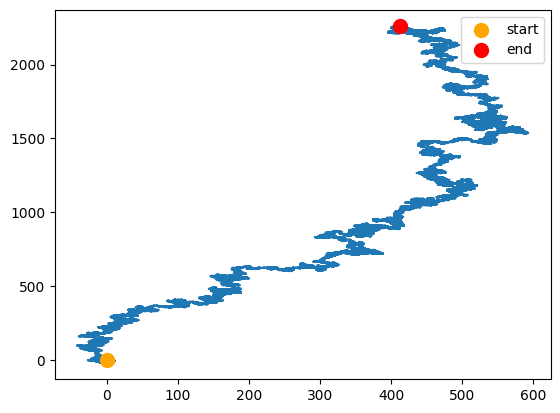

Distance between point (0, 0) to the walker: 2294.6893


In [8]:
result = masochist_s_walk(start_point, display = True)

print(f'Distance between point {start_point} to the walker:', np.round(distance(start_point, result), 4))

# Trends in Random Walks

One intriguing question for me was whether it is possible to predict the distance from the endpoint to the starting point. To investigate this, I conducted a test where I repeated a 1000-step walk 1000 times and observed the results.

In [9]:
num_trials = 1000
num_steps = 1000
start_point = (0, 0)

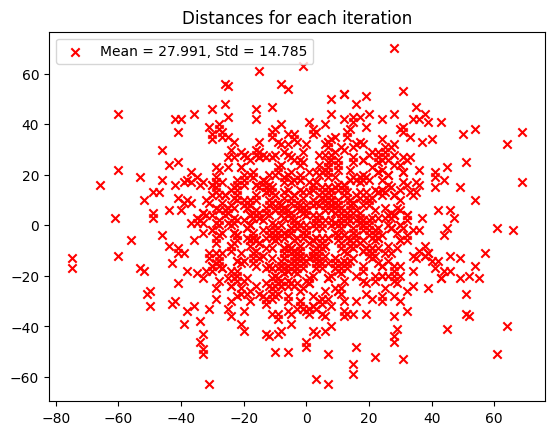

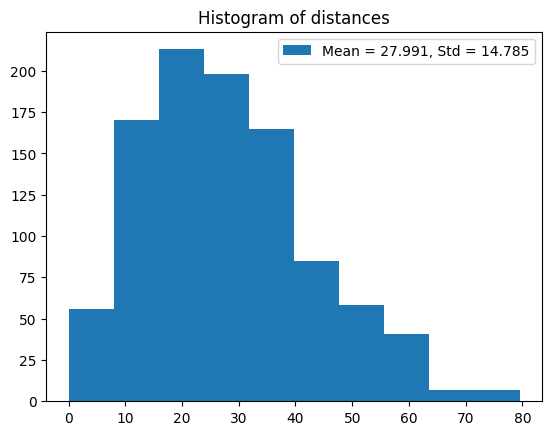

Mean = 27.991, Std = 14.785


In [10]:
# Experiment 1

x_finish = []
y_finish = []

distances = []

for trial in range(num_trials):
    walk = drunkard_s_walk(start_point, num_steps)
    x_finish.append(walk[0])
    y_finish.append(walk[1])
    distances.append(distance(start_point, walk))

mean_exp = np.round(lds.mean(distances), 3)
std_exp = np.round(lds.std(distances), 3)

plt.scatter(x_finish, y_finish, marker='x', color='red', label=f'Mean = {mean_exp}, Std = {std_exp}')
plt.title(f'Distances for each iteration')
plt.legend()
plt.show()

plt.hist(distances, label=f'Mean = {mean_exp}, Std = {std_exp}')
plt.title(f'Histogram of distances')
plt.legend()
plt.show()

print(f'Mean = {mean_exp}, Std = {std_exp}')

mean_exp_1 = mean_exp
std_exp_1 = std_exp


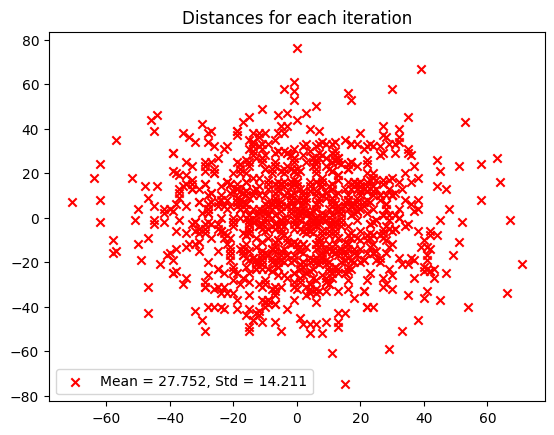

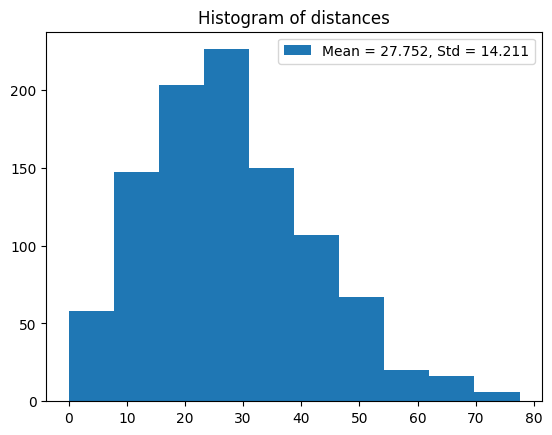

Mean = 27.752, Std = 14.211


In [11]:
# Experiment 2

x_finish = []
y_finish = []

distances = []

for trial in range(num_trials):
    walk = drunkard_s_walk(start_point, num_steps)
    x_finish.append(walk[0])
    y_finish.append(walk[1])
    distances.append(distance(start_point, walk))

mean_exp = np.round(lds.mean(distances), 3)
std_exp = np.round(lds.std(distances), 3)

plt.scatter(x_finish, y_finish, marker='x', color='red', label=f'Mean = {mean_exp}, Std = {std_exp}')
plt.title(f'Distances for each iteration')
plt.legend()
plt.show()

plt.hist(distances, label=f'Mean = {mean_exp}, Std = {std_exp}')
plt.title(f'Histogram of distances')
plt.legend()
plt.show()

print(f'Mean = {mean_exp}, Std = {std_exp}')

mean_exp_2 = mean_exp
std_exp_2 = std_exp


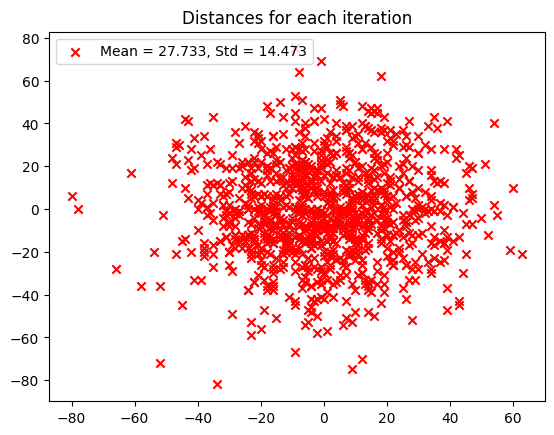

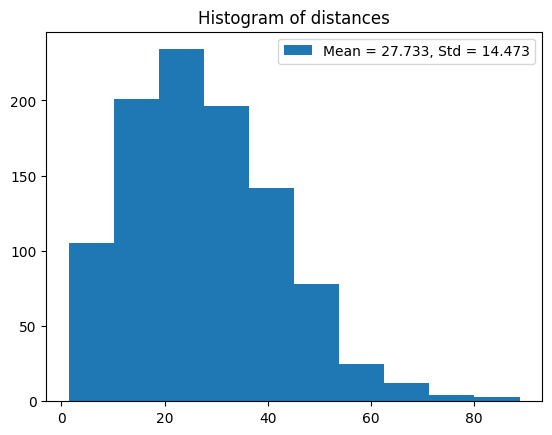

Mean = 27.733, Std = 14.473


In [12]:
# Experiment 3

x_finish = []
y_finish = []

distances = []

for trial in range(num_trials):
    walk = drunkard_s_walk(start_point, num_steps)
    x_finish.append(walk[0])
    y_finish.append(walk[1])
    distances.append(distance(start_point, walk))

mean_exp = np.round(lds.mean(distances), 3)
std_exp = np.round(lds.std(distances), 3)

plt.scatter(x_finish, y_finish, marker='x', color='red', label=f'Mean = {mean_exp}, Std = {std_exp}')
plt.title(f'Distances for each iteration')
plt.legend()
plt.show()

plt.hist(distances, label=f'Mean = {mean_exp}, Std = {std_exp}')
plt.title(f'Histogram of distances')
plt.legend()
plt.show()

print(f'Mean = {mean_exp}, Std = {std_exp}')

mean_exp_3 = mean_exp
std_exp_3 = std_exp

In [13]:
print(mean_exp_1, mean_exp_2, mean_exp_3)
print(std_exp_1, std_exp_2, std_exp_3)

27.991 27.752 27.733
14.785 14.211 14.473


|          | Experiment 1 | Experiment 2 | Experiment 3 |
|----------|--------------|--------------|--------------|
| **Mean** | 27.991       | 27.752       | 27.733       |
| **Std**  | 14.785        | 14.211       | 14.473       |

Looking at the results, I can conclude that they indicate a strong recurring trend. Additionally, I examined whether the number of trials makes a difference.

In [14]:
trials = [10, 100, 1000, 10000, 100000]

In [15]:
means = []
stds = []

for num_trials in trials:
    x_finish = []
    y_finish = []

    distances = []

    for trial in range(num_trials):
        walk = drunkard_s_walk(start_point, num_steps)
        x_finish.append(walk[0])
        y_finish.append(walk[1])
        distances.append(distance(start_point, walk))

    mean_exp = np.round(lds.mean(distances), 3)
    std_exp = np.round(lds.std(distances), 3)

    means.append(mean_exp)
    stds.append(std_exp)

In [16]:
print(means)
print(stds)

[np.float64(35.159), np.float64(28.326), np.float64(27.457), np.float64(27.902), np.float64(28.039)]
[np.float64(17.528), np.float64(15.92), np.float64(14.622), np.float64(14.577), np.float64(14.636)]


|          | 10 Trials | 100 Trials | 1000 Trials | 10000 Trials | 100000 Trials |
|----------|-----------|------------|-------------|--------------|---------------|
| **Mean** | 35.159    | 28.326     | 27.457      | 27.902       | 28.039        |
| **Std**  | 17.528    | 15.92      | 14.622      | 14.577       | 14.636        |

Regardless of the number of trials, the results were very similar. Therefore, based on the examined model, I can conclude that the average distance after 1000 steps is approximately 28, with most results falling within the range $[28-14, 28+14] = [14, 42]$.

Below, I also tested the estimated distances for different numbers of steps.

In [17]:
steps = [100, 1000, 10000, 100000]
num_trials = 1000

In [18]:
means = []
stds = []

for num_steps in steps:
    x_finish = []
    y_finish = []

    distances = []

    for trial in range(num_trials):
        walk = drunkard_s_walk(start_point, num_steps)
        x_finish.append(walk[0])
        y_finish.append(walk[1])
        distances.append(distance(start_point, walk))

    mean_exp = np.round(lds.mean(distances), 3)
    std_exp = np.round(lds.std(distances), 3)

    means.append(mean_exp)
    stds.append(std_exp)

In [19]:
print(means)
print(stds)

[np.float64(8.874), np.float64(27.774), np.float64(89.556), np.float64(288.77)]
[np.float64(4.567), np.float64(14.462), np.float64(46.011), np.float64(147.264)]


|          | 100 Steps | 1000 Steps | 10000 Steps | 100000 Steps |
|----------|-----------|------------|-------------|--------------|
| **Mean** | 8.874     | 27.774     | 89.556      | 288.77       |
| **Std**  | 4.567     | 14.462     | 46.011      | 147.264      |


It is interesting that the standard deviation is close to half of the mean. $$Mean(distances) = 2 \times Std(distances)$$